In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.duplicated().sum()

np.int64(0)

In [9]:
features=data.drop(columns=['Sales'])
target=data['Sales']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

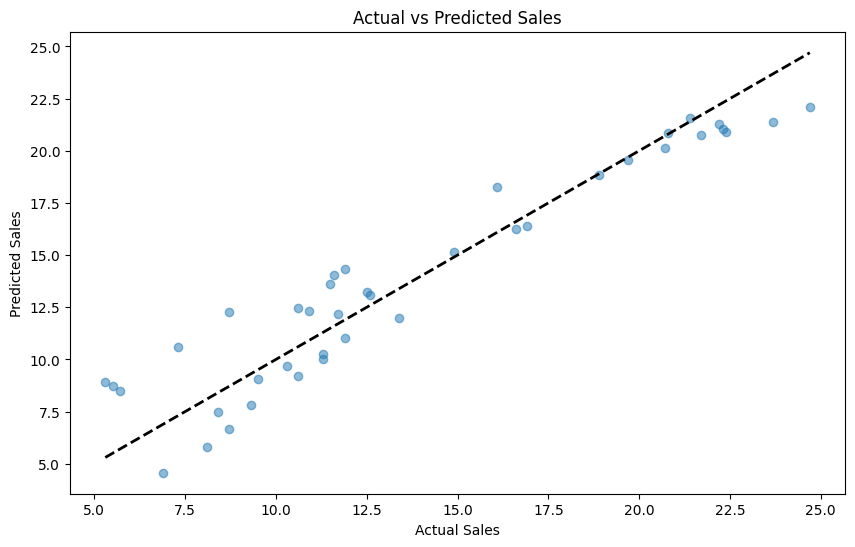

In [10]:
model=LinearRegression()
model.fit(features_train, target_train)
predictions=model.predict(features_test)
plt.figure(figsize=(10, 6))
plt.scatter(target_test, predictions, alpha=0.5)
plt.xlabel('Actual Sales')  
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], 'k--', lw=2)
plt.show()

In [11]:
# Get the model's coefficients
coefficients = model.coef_

# Print out the coefficients for each feature
feature_names = features.columns
for feature, coef in zip(feature_names, coefficients):
    print(f'Coefficient for {feature}: {coef:.2f}')


Coefficient for TV: 3.76
Coefficient for Radio: 2.79
Coefficient for Newspaper: 0.06


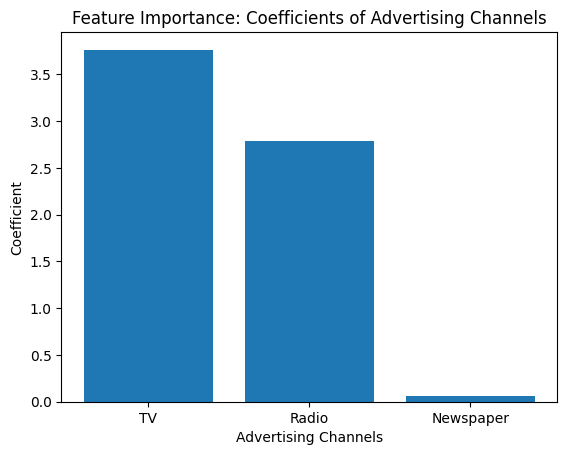

In [12]:

# Plot the coefficients of each feature
plt.bar(feature_names, coefficients)
plt.xlabel('Advertising Channels')
plt.ylabel('Coefficient')
plt.title('Feature Importance: Coefficients of Advertising Channels')
plt.show()


In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
mae = mean_absolute_error(target_test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate R-squared (R²)
r2 = r2_score(target_test, predictions)
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 1.46
R-squared (R²): 0.90


In [17]:
# Check summary statistics for the 'Sales' column
print(data['Sales'].describe())


count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64


In [ ]:
# Calculate the mean sales value
mean_sales = data['Sales'].mean()

# Calculate the MAE as a proportion of the mean sales
mae_percentage = (mae / mean_sales) * 100
print(f'MAE as a percentage of mean sales: {mae_percentage:.2f}%')
#from this we can conclude that the model is acceptable as the MAE is 10% of the mean sales value.

MAE as a percentage of mean sales: 10.42%
